In [1]:
# Importing Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import *
from sklearn.externals import joblib
from sklearn import datasets
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import os

# Hide warnings

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Importing the Dataset

telecom  = pd.read_csv("telecom_churn_data.csv")

In [3]:
# Analysing the Dataset

# Dimensions
print("Dimensions: ", telecom.shape, "\n")

# Data types
print(telecom.info())

# Analysing the head of the dataframe
telecom.head()

Dimensions:  (99999, 226) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Displaying the column names of the dataframe telecom

print(telecom.columns)

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)


In [5]:
# Displaying the datatypes of the column names

telecom.dtypes

mobile_number             int64
circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
last_date_of_month_8     object
last_date_of_month_9     object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
arpu_9                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
onnet_mou_9             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
offnet_mou_9            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_ic_mou_9           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
roam_og_mou_9           float64
loc_og_t2t_mou_6        float64
                         ...   
arpu_2g_

In [6]:
# Checking the Null values in the dataframe telecom

pd.set_option('display.max_rows', 1200)
pd.set_option('display.max_columns', 1200)
pd.set_option('display.width', 1500)
100*telecom.loc[:,telecom.isnull().any()].isnull().sum()/len(telecom.index)

loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_mou_7             3.859039
loc_og_t2t_mou_8             5.378054
loc_og_t2t_mou_9             7.745077
loc_og_t2m_m

In [7]:
# Replacing all the Null values by 0 in the dataframe

telecom.fillna(0, inplace = True)

In [8]:
# Displaying the head of the dataframe again

telecom.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00

In [9]:
100*telecom.loc[:,telecom.isnull().any()].isnull().sum()/len(telecom.index)

Series([], dtype: float64)

In [10]:
telecom['circle_id'].nunique() == 1

True

## Data Exploration

In [11]:
# Dropping the columns which have date in the column

telecom.drop(['last_date_of_month_6'], axis = 1, inplace = True)
telecom.drop(['last_date_of_month_7'], axis = 1, inplace = True)
telecom.drop(['last_date_of_month_8'], axis = 1, inplace = True)
telecom.drop(['last_date_of_month_9'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_6'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_7'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_8'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_9'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_data_6'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_data_7'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_data_8'], axis = 1, inplace = True)
telecom.drop(['date_of_last_rech_data_9'], axis = 1, inplace = True)
telecom.drop(['mobile_number'], axis = 1, inplace = True)
telecom.drop(['circle_id'], axis = 1, inplace = True)

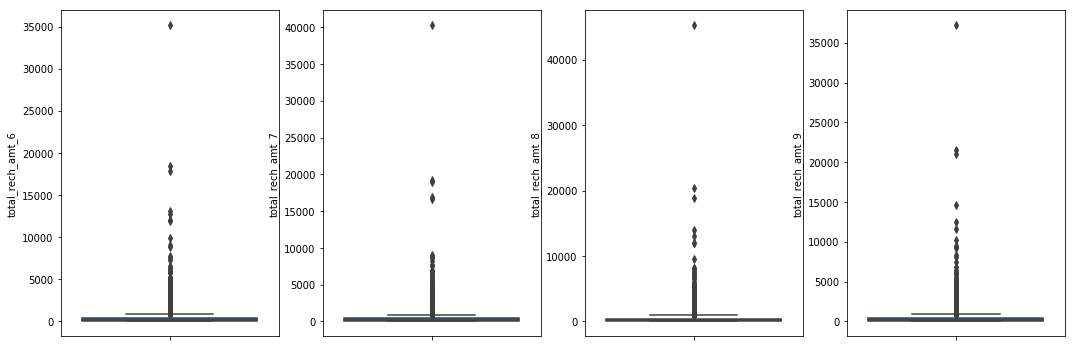

In [12]:
# Checking for outliers

plt.figure(figsize=(18, 6))
plt.subplot(1,4,1)
sns.boxplot(y=telecom['total_rech_amt_6'])
plt.subplot(1,4,2)
sns.boxplot(y=telecom['total_rech_amt_7'])
plt.subplot(1,4,3)
sns.boxplot(y=telecom['total_rech_amt_8'])
plt.subplot(1,4,4)
sns.boxplot(y=telecom['total_rech_amt_9'])
plt.show()

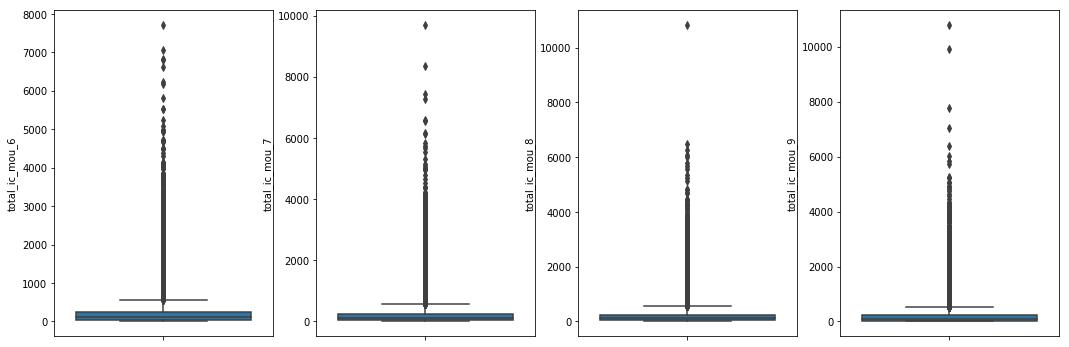

In [13]:
# Checking for outliers

plt.figure(figsize=(18, 6))
plt.subplot(1,4,1)
sns.boxplot(y=telecom['total_ic_mou_6'])
plt.subplot(1,4,2)
sns.boxplot(y=telecom['total_ic_mou_7'])
plt.subplot(1,4,3)
sns.boxplot(y=telecom['total_ic_mou_8'])
plt.subplot(1,4,4)
sns.boxplot(y=telecom['total_ic_mou_9'])
plt.show()

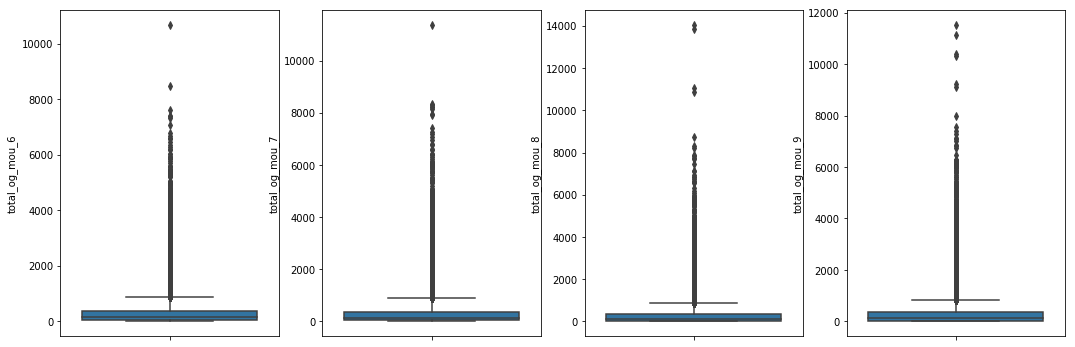

In [14]:
# Checking for outliers

plt.figure(figsize=(18, 6))
plt.subplot(1,4,1)
sns.boxplot(y=telecom['total_og_mou_6'])
plt.subplot(1,4,2)
sns.boxplot(y=telecom['total_og_mou_7'])
plt.subplot(1,4,3)
sns.boxplot(y=telecom['total_og_mou_8'])
plt.subplot(1,4,4)
sns.boxplot(y=telecom['total_og_mou_9'])
plt.show()

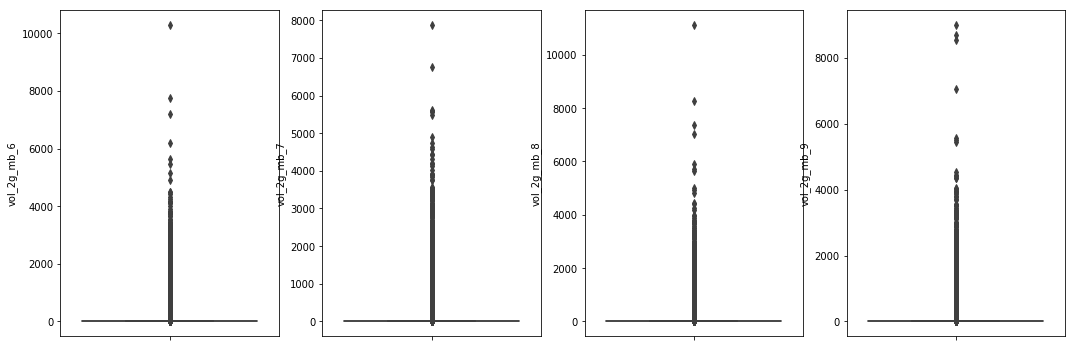

In [15]:
# Checking for outliers

plt.figure(figsize=(18, 6))
plt.subplot(1,4,1)
sns.boxplot(y=telecom['vol_2g_mb_6'])
plt.subplot(1,4,2)
sns.boxplot(y=telecom['vol_2g_mb_7'])
plt.subplot(1,4,3)
sns.boxplot(y=telecom['vol_2g_mb_8'])
plt.subplot(1,4,4)
sns.boxplot(y=telecom['vol_2g_mb_9'])
plt.show()

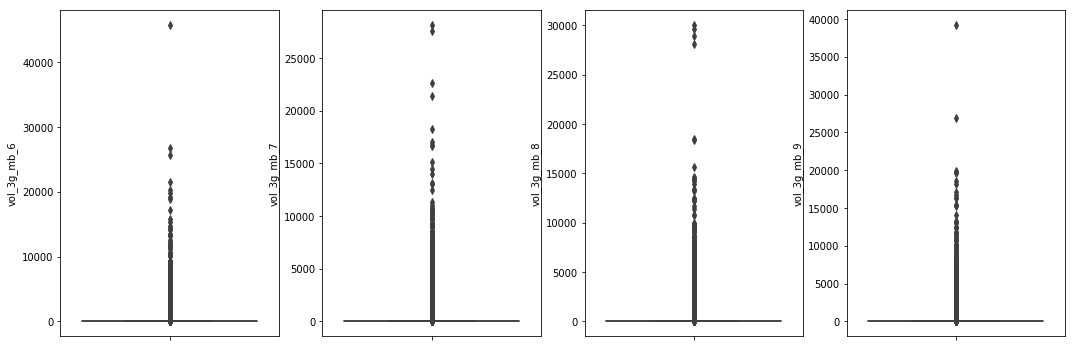

In [16]:
# Checking for outliers

plt.figure(figsize=(18, 6))
plt.subplot(1,4,1)
sns.boxplot(y=telecom['vol_3g_mb_6'])
plt.subplot(1,4,2)
sns.boxplot(y=telecom['vol_3g_mb_7'])
plt.subplot(1,4,3)
sns.boxplot(y=telecom['vol_3g_mb_8'])
plt.subplot(1,4,4)
sns.boxplot(y=telecom['vol_3g_mb_9'])
plt.show()

In [17]:
# Checking the shape of the dataframe

telecom.shape

(99999, 212)

In [18]:
# Removing outliers

telecom = telecom[telecom['total_rech_amt_6'] < 30000]
telecom = telecom[telecom['total_rech_amt_7'] < 35000]
telecom = telecom[telecom['total_rech_amt_8'] < 40000]
telecom = telecom[telecom['total_rech_amt_9'] < 30000]

In [19]:
# Checking the shape of the dataframe after outlier treatment

telecom.shape

(99998, 212)

## Filtering high-value customers

In [20]:
# For 70th Percentile

telecom['total_rech_avg_amt_m6_m7'] = (telecom['total_rech_amt_6']+ telecom['total_rech_amt_7'])/2

In [21]:
filter_high_valued_cust = np.percentile(telecom['total_rech_avg_amt_m6_m7'] ,70)
filter_high_valued_cust

368.5

In [22]:
telecom_df = telecom.loc[telecom['total_rech_avg_amt_m6_m7'] > filter_high_valued_cust]

In [23]:
telecom_df.head(5)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_avg_amt_m6_m7
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.0,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0

In [24]:
# Checking the shape of the dataframe after filtering high value customers

telecom_df.shape

(29978, 213)

## Creating Derived Columns

In [25]:
telecom_df['IsChurn'] = np.where((telecom_df['total_ic_mou_9']==0) & 
                                   (telecom_df['total_og_mou_9']==0) & 
                                   (telecom_df['vol_2g_mb_9']==0) & 
                                   (telecom_df['vol_3g_mb_9']==0), 1, 0)

In [26]:
# Counting number of customers who churned

telecom_df['IsChurn'].value_counts()

0    27389
1     2589
Name: IsChurn, dtype: int64

In [27]:
telecom_df.shape

(29978, 214)

In [28]:
#  Removing the columns with _9 in the column name

df_filter_cols = telecom_df.filter(regex='_9')
df_filter_cols.columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9'], dtype='object')

In [29]:
df_filter_cols = df_filter_cols.columns

telecom_df = telecom_df.drop(df_filter_cols, axis =1 )
telecom_df.shape

(29978, 163)

In [30]:
# Checking the churn percentage before PCA and Model Building

churn = (sum(telecom_df['IsChurn'])/len(telecom_df['IsChurn'].index))*100
churn

8.636333311094804

## Performing PCA

In [31]:
# Importing the PCA module

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=98)

In [32]:
# Creating a copy of the dataframe in pca_df

pca_df = telecom_df.copy()

In [33]:
# Doing the PCA on the data

pca.fit(pca_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=98,
  svd_solver='randomized', tol=0.0, whiten=False)

In [34]:
pca.components_

array([[-7.03400206e-17, -0.00000000e+00,  1.11022302e-16, ...,
        -9.94437221e-04,  1.30567479e-01, -1.10059378e-06],
       [-7.16397902e-17,  1.11022302e-16, -1.11022302e-16, ...,
         5.11125766e-03,  1.53873874e-01, -1.69930187e-05],
       [-1.23896407e-17,  5.55111512e-17,  1.66533454e-16, ...,
        -8.38109268e-04, -9.72621803e-02,  4.04503248e-05],
       ...,
       [-0.00000000e+00, -4.72521665e-02,  5.50983320e-02, ...,
         2.59666420e-17,  4.24527092e-04, -1.37850271e-16],
       [ 1.00000000e+00, -9.50166937e-27,  4.97943301e-26, ...,
        -4.01849954e-15, -1.35918764e-16,  9.56807144e-16],
       [-0.00000000e+00, -1.57979931e-01,  8.47723357e-02, ...,
         3.53580012e-15, -6.03096734e-01,  2.21330175e-15]])

In [35]:
pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2], 
                           'PC4':pca.components_[3], 'PC5':pca.components_[4],'PC6':pca.components_[5],
                           'PC7':pca.components_[6], 'PC8':pca.components_[7], 'PC9':pca.components_[8],
                           'Feature':telecom_df.columns }).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-7.034002e-17,-7.163979e-17,-1.238964e-17,2.324796e-19,-1.453862e-19,-1.006354e-18,-1.694918e-19,1.181609e-19,3.374599e-20,loc_og_t2o_mou
1,-0.000000e+00,1.110223e-16,5.551115e-17,6.505213e-17,2.358140e-17,-6.375109e-17,1.008308e-17,3.529078e-17,3.128601e-17,std_og_t2o_mou
2,1.110223e-16,-1.110223e-16,1.665335e-16,2.033963e-16,1.166602e-16,-3.469447e-18,6.158268e-17,2.406929e-17,-1.291827e-16,loc_ic_t2o_mou
3,9.607038e-02,1.218666e-01,-7.865923e-02,3.579906e-02,-1.378202e-01,-1.925927e-01,2.361335e-01,-1.985373e-02,1.287580e-01,arpu_6
4,1.216512e-01,1.407087e-01,-8.011904e-02,3.590113e-02,-2.052302e-02,3.651074e-02,2.555294e-01,-3.025728e-02,-2.479627e-01,arpu_7


In [36]:
pca.explained_variance_

array([3.08466620e+06, 2.29994667e+06, 1.35202042e+06, 8.79422817e+05,
       7.68536700e+05, 7.04931811e+05, 5.29712005e+05, 4.04423897e+05,
       3.23748617e+05, 3.01858106e+05, 2.17713352e+05, 1.92789318e+05,
       1.62043539e+05, 1.53344657e+05, 1.40384327e+05, 1.13538471e+05,
       9.36576420e+04, 8.46311879e+04, 7.90936548e+04, 6.36803393e+04,
       6.18816090e+04, 5.47844391e+04, 5.25455588e+04, 4.62677721e+04,
       4.30359046e+04, 3.78740239e+04, 3.58437319e+04, 3.30098332e+04,
       3.10226799e+04, 2.90415753e+04, 2.69864579e+04, 2.28902071e+04,
       2.11059721e+04, 2.02907271e+04, 1.74697509e+04, 1.46454055e+04,
       1.36075783e+04, 1.30203622e+04, 1.15735308e+04, 1.08283377e+04,
       1.06859384e+04, 1.03860046e+04, 9.66126983e+03, 9.23059087e+03,
       8.66873341e+03, 8.28255908e+03, 8.08600036e+03, 6.98892368e+03,
       6.34308982e+03, 6.07837063e+03, 5.77293059e+03, 5.29082176e+03,
       5.07562754e+03, 5.05268935e+03, 4.91146524e+03, 4.40200351e+03,
      

In [37]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [24.3 18.1 10.6  6.9  6.1  5.5  4.2  3.2  2.5  2.4  1.7  1.5  1.3  1.2
  1.1  0.9  0.7  0.7  0.6  0.5  0.5  0.4  0.4  0.4  0.3  0.3  0.3  0.3
  0.2  0.2  0.2  0.2  0.2  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0. ]


In [38]:
print (pca.explained_variance_ratio_.cumsum())

[0.24285456 0.42392846 0.5303725  0.59960911 0.66011571 0.71561471
 0.75731873 0.78915886 0.81464747 0.83841264 0.85555312 0.87073135
 0.88348897 0.89556174 0.90661414 0.91555298 0.92292661 0.92958959
 0.9358166  0.94083013 0.94570205 0.9500152  0.9541521  0.95779474
 0.96118294 0.96416475 0.96698671 0.96958556 0.97202796 0.9743144
 0.97643903 0.97824117 0.97990283 0.98150031 0.9828757  0.98402873
 0.98510004 0.98612513 0.98703631 0.98788882 0.98873012 0.98954781
 0.99030844 0.99103516 0.99171764 0.99236973 0.99300633 0.99355657
 0.99405596 0.99453451 0.99498901 0.99540555 0.99580515 0.99620295
 0.99658963 0.99693619 0.99718382 0.99742442 0.99766059 0.99787078
 0.99804925 0.99821787 0.99838385 0.99852825 0.99866526 0.99878957
 0.99891157 0.99901674 0.9991191  0.99921875 0.99931479 0.99940491
 0.99949254 0.99956207 0.99962764 0.99967905 0.99972362 0.99976777
 0.9998016  0.99983262 0.99985766 0.99987426 0.99988895 0.99990334
 0.99991529 0.99992662 0.99993658 0.99994528 0.99995309 0.99996

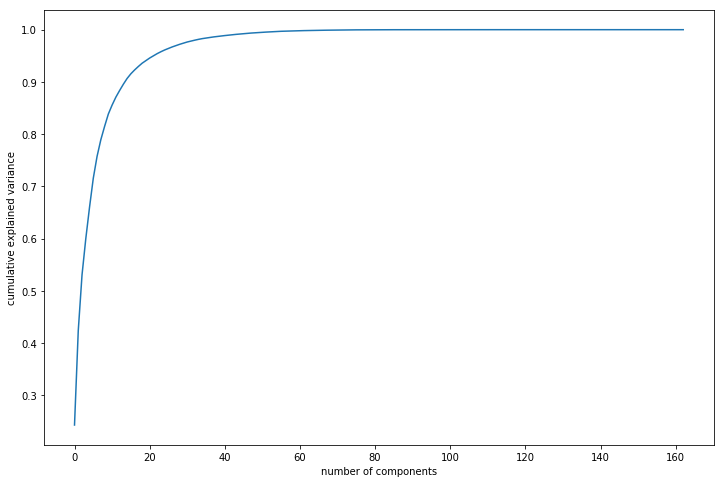

In [39]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

## 10 Components reprsent about 90% of the dataset information

In [40]:
# Using incremental PCA for efficiency - saves a lot of time on larger datasets

from sklearn.decomposition import IncrementalPCA
pca_inc = IncrementalPCA(n_components=10)

In [41]:
# Basis transformation - getting the data onto our PCs

df_X_norm_pca = pca_inc.fit_transform(pca_df)
df_X_norm_pca.shape

(29978, 10)

In [42]:
corrmat = np.corrcoef(df_X_norm_pca.transpose())

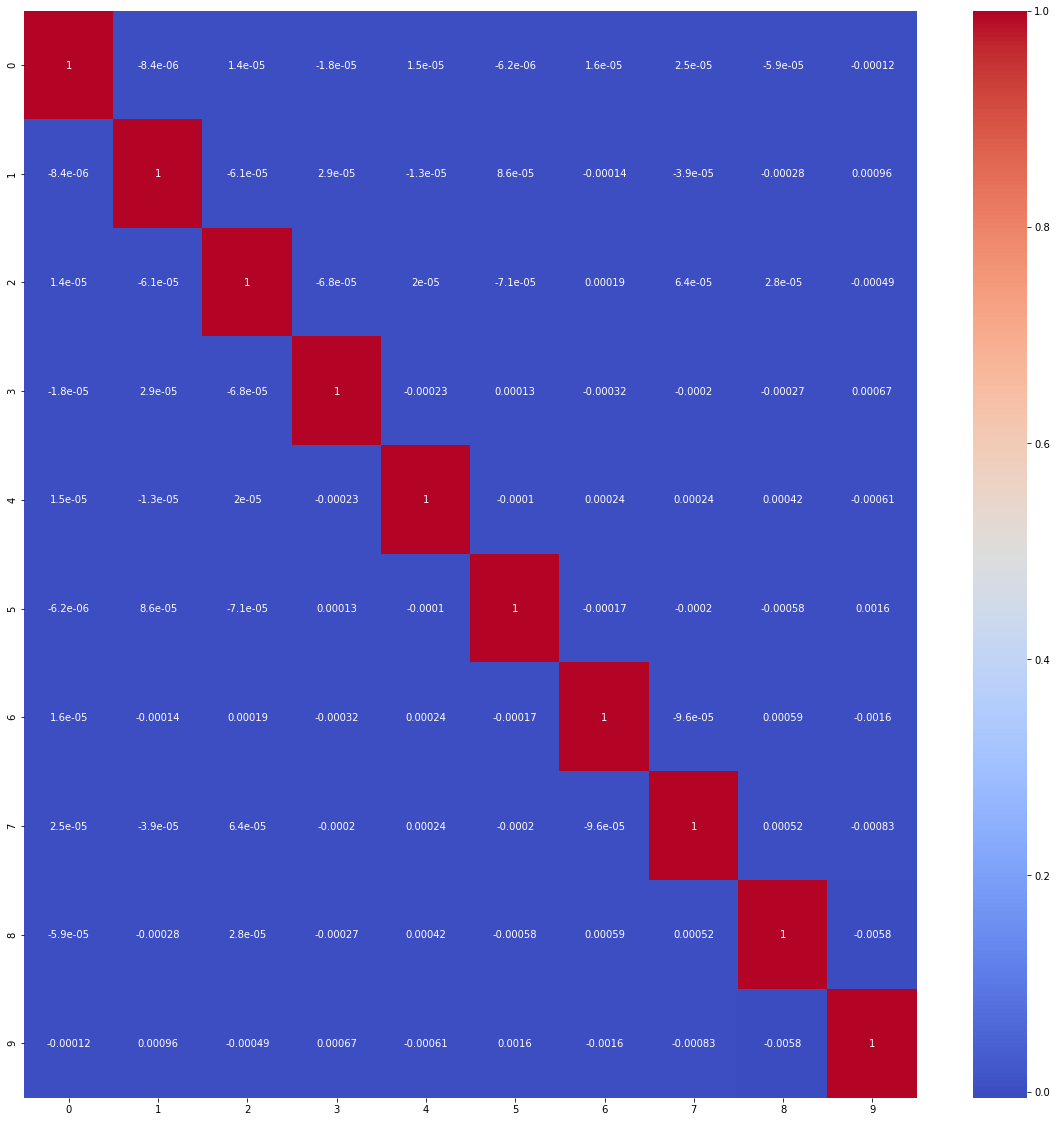

In [43]:
# Plotting the correlation matrix

%matplotlib inline
plt.figure(figsize = (20,20))
sns.heatmap(corrmat,cmap='coolwarm', annot = True)

In [44]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.0015567969672409846 , min corr:  -0.005797756004956159


In [45]:
pca_inc.explained_variance_

array([3084610.46003106, 2299672.26455113, 1351903.96248961,
        879144.08935294,  768305.8099818 ,  704773.51900702,
        528719.80201087,  403676.59433641,  321309.16058139,
        290990.69260182])

In [46]:
print("pca_inc.explained_variance_ratio_: ",pca_inc.explained_variance_ratio_.round(3)*100)

pca_inc.explained_variance_ratio_:  [24.3 18.1 10.6  6.9  6.   5.5  4.2  3.2  2.5  2.3]


In [47]:
np.cumsum(np.round(pca_inc.explained_variance_ratio_, decimals=4)*100)

array([24.29, 42.4 , 53.04, 59.96, 66.01, 71.56, 75.72, 78.9 , 81.43,
       83.72])

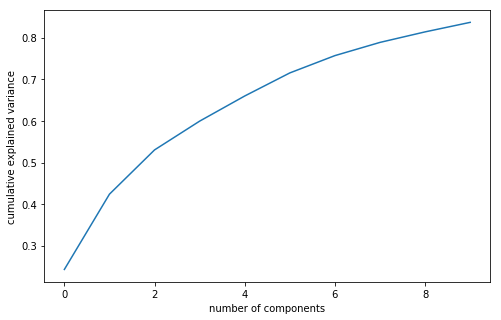

In [48]:
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca_inc.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [49]:
df = pd.DataFrame(df_X_norm_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

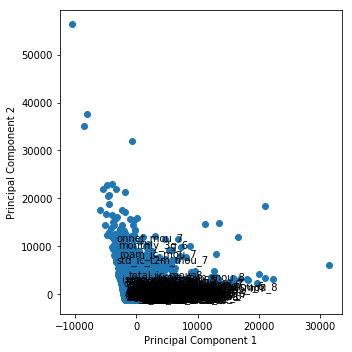

In [50]:
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(df.PC1, df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(telecom_df.columns):
    plt.annotate(txt, (df.PC1[i],df.PC2[i]))
plt.tight_layout()
plt.show()

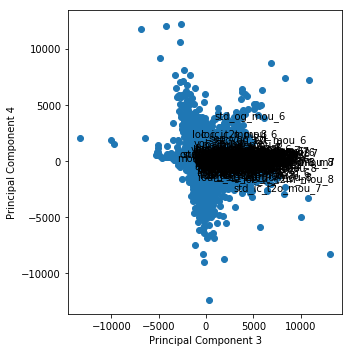

In [51]:
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(df.PC3, df.PC4)
plt.xlabel('Principal Component 3')
plt.ylabel('Principal Component 4')
for i, txt in enumerate(telecom_df.columns):
    plt.annotate(txt, (df.PC3[i],df.PC4[i]))
plt.tight_layout()
plt.show()

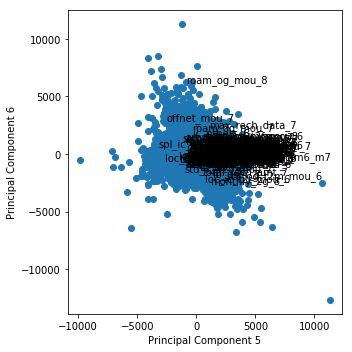

In [52]:
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(df.PC5, df.PC6)
plt.xlabel('Principal Component 5')
plt.ylabel('Principal Component 6')
for i, txt in enumerate(telecom_df.columns):
    plt.annotate(txt, (df.PC5[i],df.PC6[i]))
plt.tight_layout()
plt.show()

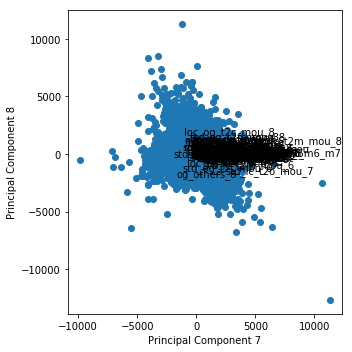

In [53]:
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(df.PC5, df.PC6)
plt.xlabel('Principal Component 7')
plt.ylabel('Principal Component 8')
for i, txt in enumerate(telecom_df.columns):
    plt.annotate(txt, (df.PC7[i],df.PC8[i]))
plt.tight_layout()
plt.show()

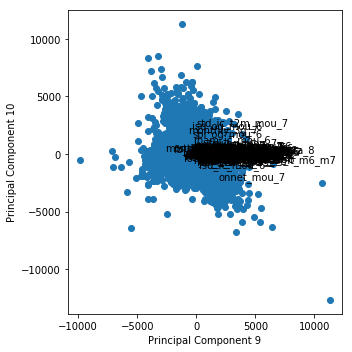

In [54]:
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.scatter(df.PC5, df.PC6)
plt.xlabel('Principal Component 9')
plt.ylabel('Principal Component 10')
for i, txt in enumerate(telecom_df.columns):
    plt.annotate(txt, (df.PC9[i],df.PC10[i]))
plt.tight_layout()
plt.show()

In [55]:
X = df
y = pca_df['IsChurn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Model Building

### Using Random Forest

In [56]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [57]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
# Making predictions
predictions = rfc.predict(X_test)

In [59]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [60]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[8063  136]
 [ 629  166]]


In [61]:
print(accuracy_score(y_test,predictions))

0.9149432955303536


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8199
           1       0.55      0.21      0.30       795

   micro avg       0.91      0.91      0.91      8994
   macro avg       0.74      0.60      0.63      8994
weighted avg       0.89      0.91      0.90      8994



## Random Forest gives us very good results.

## Grid search to improve results

In [63]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 7

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model calssweight is used to remove class imbalance
rf = RandomForestClassifier(class_weight={0:0.05 , 1:0.95})


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [64]:
print(rf.best_estimator_ )

RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=17, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


In [65]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,0.213738,0.023546,0.006205,0.007026,2,{'max_depth': 2},0.452151,0.464155,0.495664,0.498498,0.460460,0.501168,0.444444,0.473790,0.022162,4,0.446928,0.474117,0.498388,0.486129,0.463613,0.504475,0.438372,0.473146,0.023225
1,0.588437,0.008783,0.008103,0.009837,7,{'max_depth': 7},0.800600,0.785262,0.791528,0.792793,0.791124,0.779112,0.793126,0.790507,0.006242,3,0.802947,0.810286,0.815023,0.802468,0.801079,0.798744,0.808473,0.805574,0.005389
2,0.798281,0.010917,0.013430,0.005483,12,{'max_depth': 12},0.887629,0.890964,0.878919,0.882883,0.879213,0.869536,0.882216,0.881624,0.006375,2,0.925660,0.928941,0.930946,0.926947,0.931173,0.926280,0.924501,0.927778,0.002422
3,0.863924,0.013630,0.006695,0.007731,17,{'max_depth': 17},0.909637,0.909303,0.912275,0.916583,0.906573,0.902236,0.906907,0.909074,0.004221,1,0.970920,0.972310,0.977872,0.970479,0.971313,0.970034,0.971146,0.972010,0.002482


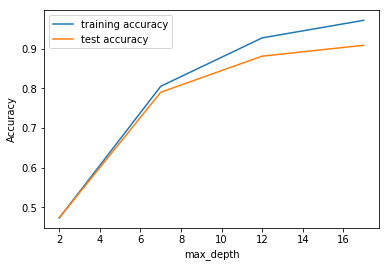

In [66]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>

In [67]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(50, 500, 50)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                n_jobs = -1,verbose = 1 )
rf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(50, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [68]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.296587,0.150207,0.058125,0.007309,50,{'n_estimators': 50},0.916131,0.915892,0.917798,0.917322,0.916349,0.916698,0.000734,1,0.919819,0.917913,0.918866,0.918032,0.918037,0.918533,0.000728
1,4.984555,0.137285,0.099595,0.005289,100,{'n_estimators': 100},0.915892,0.916369,0.916845,0.916369,0.915396,0.916174,0.000492,9,0.919044,0.917734,0.918032,0.916960,0.916964,0.917747,0.000774
2,7.941306,0.143266,0.151818,0.012292,150,{'n_estimators': 150},0.915892,0.915892,0.917084,0.917798,0.916587,0.916651,0.000729,3,0.919461,0.918211,0.917674,0.917913,0.918037,0.918259,0.000626
3,10.400375,0.372392,0.185940,0.003461,200,{'n_estimators': 200},0.915416,0.914939,0.917084,0.917798,0.917064,0.916460,0.001091,5,0.920117,0.919104,0.918270,0.917794,0.918215,0.918700,0.000826
4,13.255707,0.248498,0.240178,0.009763,250,{'n_estimators': 250},0.915416,0.915892,0.917084,0.916131,0.916826,0.916270,0.000610,7,0.918389,0.918866,0.917972,0.917317,0.917739,0.918057,0.000533


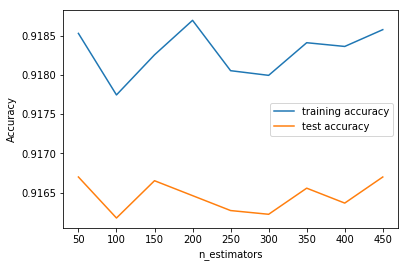

In [69]:
# plotting accuracies with n_estimators

plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features


Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [70]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [2, 4, 6, 8, 10]}

# instantiate the model
rf = RandomForestClassifier(max_depth=8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [71]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.417466,0.037384,0.015622,0.003926,2,{'max_features': 2},0.916131,0.917084,0.919705,0.918751,0.916587,0.917652,0.001356,4,0.932388,0.931673,0.931018,0.934711,0.929593,0.931877,0.001691
1,0.849990,0.024612,0.018207,0.005998,4,{'max_features': 4},0.919705,0.912318,0.918751,0.922564,0.918970,0.918462,0.003360,2,0.939715,0.937988,0.937332,0.940847,0.938885,0.938953,0.001243
2,1.196386,0.006522,0.015672,0.000109,6,{'max_features': 6},0.918037,0.916369,0.918513,0.918275,0.919685,0.918176,0.001066,3,0.940490,0.940668,0.939477,0.940847,0.941029,0.940502,0.000543
3,1.578392,0.008270,0.012508,0.006254,8,{'max_features': 8},0.914939,0.915892,0.917084,0.916131,0.918970,0.916603,0.001366,5,0.938226,0.940966,0.940430,0.943289,0.942042,0.940991,0.001694
4,1.970717,0.007679,0.012498,0.006249,10,{'max_features': 10},0.919228,0.915416,0.922087,0.919228,0.920639,0.919319,0.002221,1,0.941741,0.943647,0.941621,0.943111,0.942340,0.942492,0.000783


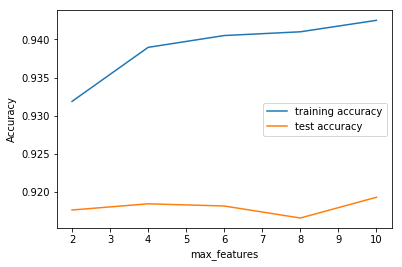

In [72]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [73]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 260, 20)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 260, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [74]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.657601,0.052554,0.015633,0.000020,100,{'min_samples_leaf': 100},0.914463,0.915892,0.918037,0.917798,0.919209,0.917080,0.001687,1,0.918270,0.918091,0.917555,0.916602,0.917024,0.917509,0.000629
1,0.638889,0.021782,0.013594,0.004083,120,{'min_samples_leaf': 120},0.915178,0.916607,0.917322,0.917560,0.917064,0.916746,0.000846,2,0.917853,0.918568,0.916781,0.917257,0.916964,0.917485,0.000652
2,0.651460,0.024777,0.015647,0.000051,140,{'min_samples_leaf': 140},0.915416,0.915892,0.916845,0.916369,0.917779,0.916460,0.000813,3,0.917972,0.917913,0.916602,0.915887,0.917262,0.917127,0.000795
3,0.606974,0.023926,0.015643,0.000059,160,{'min_samples_leaf': 160},0.913986,0.915178,0.915654,0.917322,0.915872,0.915602,0.001079,4,0.917674,0.916721,0.915589,0.916662,0.916607,0.916651,0.000660
4,0.595309,0.011623,0.015631,0.000020,180,{'min_samples_leaf': 180},0.914224,0.914463,0.915178,0.914463,0.914681,0.914602,0.000322,6,0.916900,0.914517,0.914994,0.914696,0.915594,0.915340,0.000861


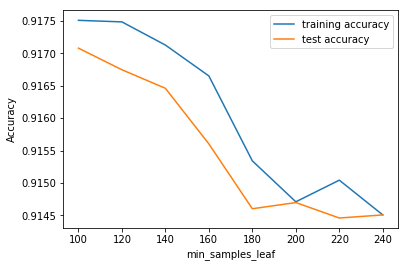

In [75]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [76]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 400, 20)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(100, 400, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [77]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.943243,0.036864,0.015867,0.000489,100,{'min_samples_split': 100},0.917084,0.917322,0.919943,0.920658,0.919924,0.918986,0.001482,1,0.925418,0.926789,0.926550,0.927384,0.926912,0.926611,0.000655
1,0.917189,0.032727,0.017244,0.002303,120,{'min_samples_split': 120},0.917322,0.918990,0.919705,0.918513,0.919685,0.918843,0.000883,2,0.923810,0.924525,0.922797,0.925121,0.924351,0.924121,0.000783
2,0.920420,0.021077,0.015621,0.000001,140,{'min_samples_split': 140},0.917084,0.916131,0.919228,0.918990,0.919924,0.918271,0.001425,4,0.922976,0.923393,0.923036,0.924584,0.922504,0.923299,0.000702
3,0.908354,0.018304,0.015647,0.000050,160,{'min_samples_split': 160},0.916131,0.916131,0.919466,0.918275,0.920400,0.918080,0.001729,5,0.922976,0.922619,0.921844,0.922142,0.921551,0.922226,0.000515
4,0.898542,0.032521,0.015624,0.000002,180,{'min_samples_split': 180},0.913986,0.916369,0.918037,0.917798,0.917302,0.916698,0.001472,12,0.920772,0.921129,0.920474,0.920832,0.921253,0.920892,0.000276


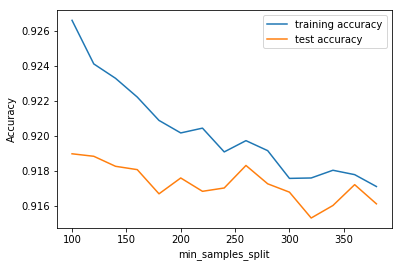

In [78]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using GridSearchCV.

In [79]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 8, 15],
    'min_samples_leaf': [50, 100, 200],
    'min_samples_split': [50, 100, 200],
    'n_estimators': [10, 50, 100], 
    'max_features': [4, 6, 10]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [80]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 11.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5, 8, 15], 'min_samples_leaf': [50, 100, 200], 'min_samples_split': [50, 100, 200], 'n_estimators': [10, 50, 100], 'max_features': [4, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [81]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9186999618757148 using {'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 10}


**Fitting the final model with the best parameters obtained from grid search.**

In [82]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=6,
                             n_estimators=50,
                             class_weight={0:0.05 , 1:0.95}
                            )

In [83]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 0.05, 1: 0.95},
            criterion='gini', max_depth=5, max_features=6,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=50,
            min_samples_split=50, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [84]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8199
           1       0.55      0.21      0.30       795

   micro avg       0.91      0.91      0.91      8994
   macro avg       0.74      0.60      0.63      8994
weighted avg       0.89      0.91      0.90      8994



In [86]:
print(confusion_matrix(y_test,predictions))

[[8063  136]
 [ 629  166]]


## Finding the top features using Linear Regression

In [87]:
X = pca_df.drop('IsChurn', 1)
y = pca_df['IsChurn']

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Lasso
from  sklearn import *
# linear regression
lm = LinearRegression()
lm.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
selcol=X.columns[lm.coef_>0]
selcoff=lm.coef_[lm.coef_>0]

sort_key=np.argsort(selcoff)
#sorting col names asc
sort_selcol=list(selcol[sort_key])
sort_selcol.reverse()
sorted_selcoff=sorted(selcoff, reverse = True)
print ('Top 10 Most Important Featues with LinearRegression:\n\n')
for x,y in zip(sort_selcol[:15],sorted_selcoff[:15]):
    print(x)

Top 10 Most Important Featues with LinearRegression:


total_rech_amt_6
total_rech_amt_7
std_og_t2c_mou_6
count_rech_2g_6
std_og_t2c_mou_8
count_rech_3g_6
std_ic_t2o_mou_7
total_rech_data_8
count_rech_2g_7
monthly_3g_6
sachet_3g_6
sachet_3g_7
monthly_3g_7
count_rech_3g_7
loc_ic_t2f_mou_8


## Finding the top features using Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [98]:
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/release/bin/'

0.9400226833010875


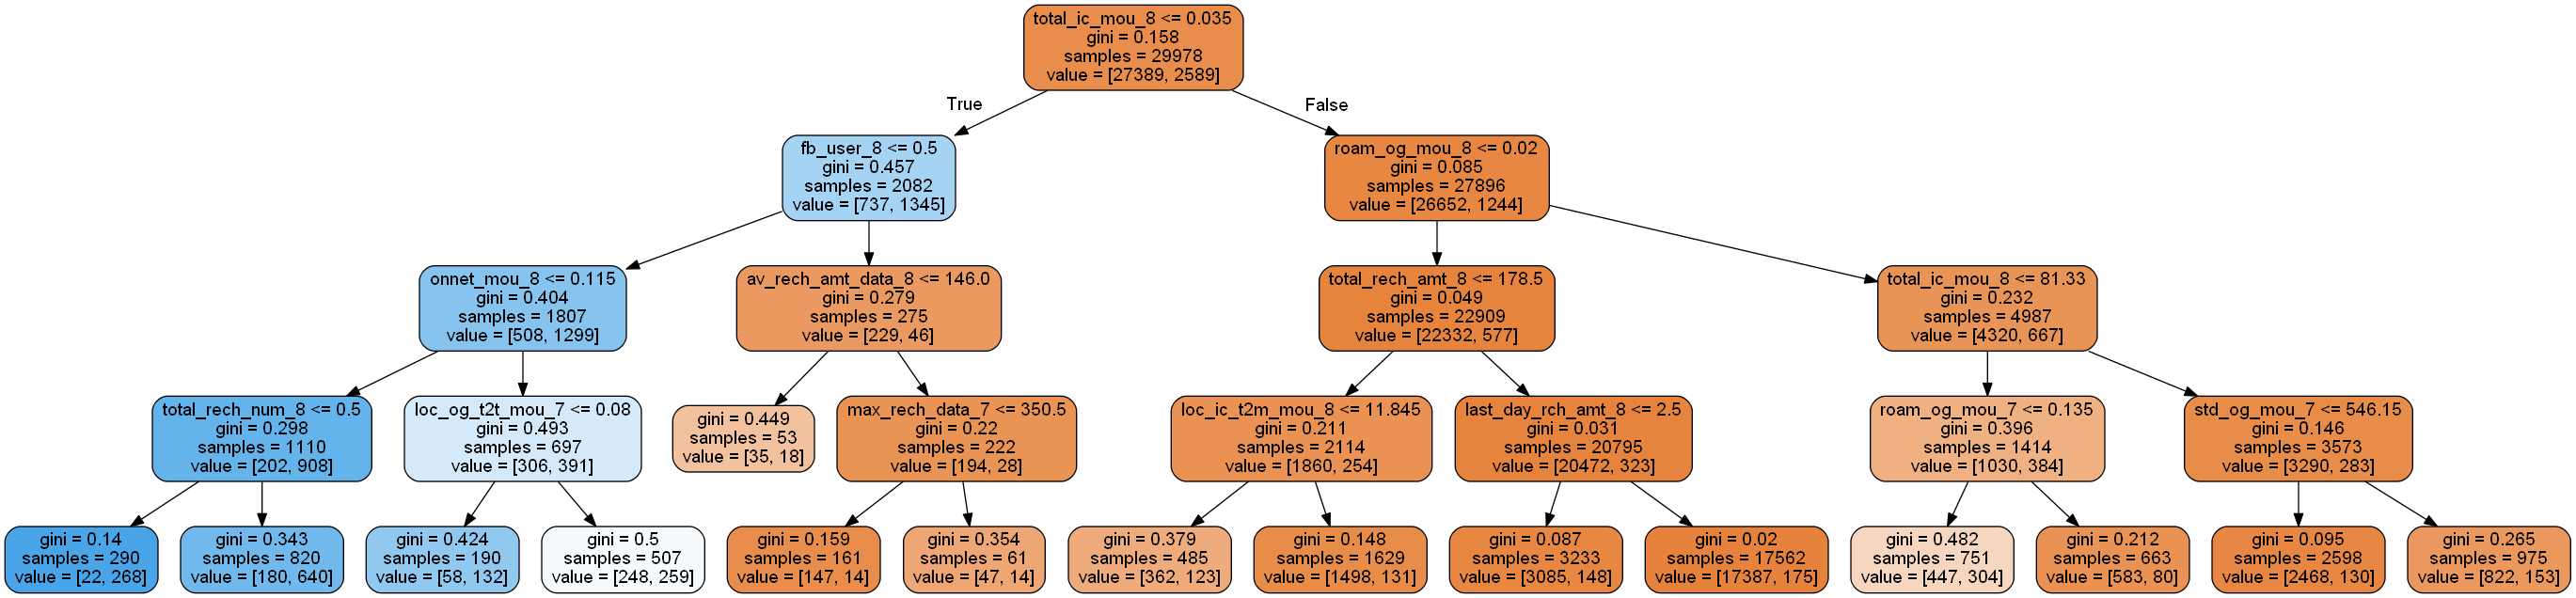

In [99]:
X = pca_df.drop('IsChurn', 1)
y = pca_df['IsChurn']
tree = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
tree.fit(X,y)

# score
print(tree.score(X,y))
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(tree, out_file=dot_data,feature_names=X.columns,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


### Top 12 features from decision tree

total_ic_mou_8

fb_user_8

onnet_mou_8

total_rech_num_8

loc_og_t2t_mou_7

av_rech_amt_data_8

max_rech_data_7

roam_og_mou_8

total_rech_amt_8

total_ic_mou_8

loc_ic_t2m_mou_8

roam_og_mou_7

std_og_mou_7

### Customer most likely to churn have 
- a decreasing trend in data usage and call usage
- a decreasing trend in amount recharged

### Suggestion to prevent chruning
- targed ad campaigns ,discounts,personalized offers to customers most likely to churn
